In [1]:
import numpy as np
import pandas as pd
import os
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def generate_data(n, r1 = (-2,2), r2 = (-4,4), mean = np.array([0.0,0.0]), cov = np.array([[0.3,-0.5],[-0.5,2]]), export_path = "./data/train.csv", 
                  verbose = 1):
    #inverse min max scale
    #random data from (0,1)
    x = np.random.rand(n,2)
    #convert data x1 and x2 to r1 and r2 
    x[:, 0] = x[:, 0] * (r1[1] - r1[0]) + r1[0]
    x[:, 1] = x[:, 1] * (r2[1] - r2[0]) + r2[0]

    y = multivariate_normal.pdf(x, mean = mean,cov=cov)
    #boundation
    if verbose == 1:
        print("x1 max: %f min: %f"% (np.max(x[:, 0]), np.min(x[:, 0])))
        print("x2 max: %f min: %f"% (np.max(x[:, 1]), np.min(x[:, 1])))
        print("x shape", x.shape)
        print("y max: %f min: %f"% (np.max(y), np.min(y)))
        print("y shape", y.shape)
    
    #save 
    data = {"x1":x[:, 0],"x2":x[:, 1], "y": y}
    df = pd.DataFrame(data)
    save_dir = os.path.dirname(export_path)
    if save_dir != "" and os.path.exists(save_dir) == False: os.makedirs(save_dir)
    df.to_csv(export_path,index=False)
def load_data(csv_file):
    df_data  = pd.read_csv(csv_file)
    return df_data[["x1", "x2"]].values, df_data[["y"]].values.flatten()
def load_dataset(csv_train = "./data/train.csv",
                 csv_valid = "./data/valid.csv",
                 csv_test  = "./data/test.csv"):
    # test
    x_test, y_test = load_data(csv_test)
    
    #train
    x_train, y_train = load_data(csv_train)
    
    #valid
    x_valid, y_valid = load_data(csv_valid)

    return x_train, y_train, x_valid, y_valid, x_test, y_test
def visualize_dataset(x, y, color = "green", title = "Training Data\n", ax = None):
    if ax is None:
        plt.figure(figsize=(16, 6))
        ax = plt.subplot(1,2,1, projection='3d')
    # if

    surf = ax.scatter(x[:,0], x[:,1], y, c = color)
    ax.set_frame_on
    ax.set_xlabel('x1', labelpad = 5, fontdict=dict(fontsize = 14))
    ax.set_ylabel('x2', labelpad = 5, fontdict=dict(fontsize = 14))
    ax.set_zlabel("y", labelpad = 5, fontdict=dict(fontsize = 14))
    plt.legend(['Gaussian values'])
    plt.title(title, fontdict=dict(fontsize = 20))

In [3]:
generate_data(n=20000, export_path="./data/train.csv", verbose = 1)
generate_data(n=100, export_path="./data/test.csv", verbose = 1)
generate_data(n=100, export_path="./data/valid.csv", verbose = 1)

x1 max: 1.999923 min: -1.999639
x2 max: 3.998375 min: -3.999262
x shape (20000, 2)
y max: 0.268801 min: 0.000000
y shape (20000,)
x1 max: 1.918526 min: -1.994522
x2 max: 3.956609 min: -3.871017
x shape (100, 2)
y max: 0.240852 min: 0.000000
y shape (100,)
x1 max: 1.996772 min: -1.957316
x2 max: 3.938484 min: -3.900324
x shape (100, 2)
y max: 0.256550 min: 0.000000
y shape (100,)


In [4]:
x_train, y_train, x_valid, y_valid, x_test, y_test = load_dataset(csv_train="./data/train.csv", csv_valid="./data/valid.csv", csv_test="./data/test.csv")

Training samples:  20000  -- Shape:  (20000, 2) (20000,)
Validating samples:  100  -- Shape:  (100, 2) (100,)
Testing samples:  100  -- Shape:  (100, 2) (100,)


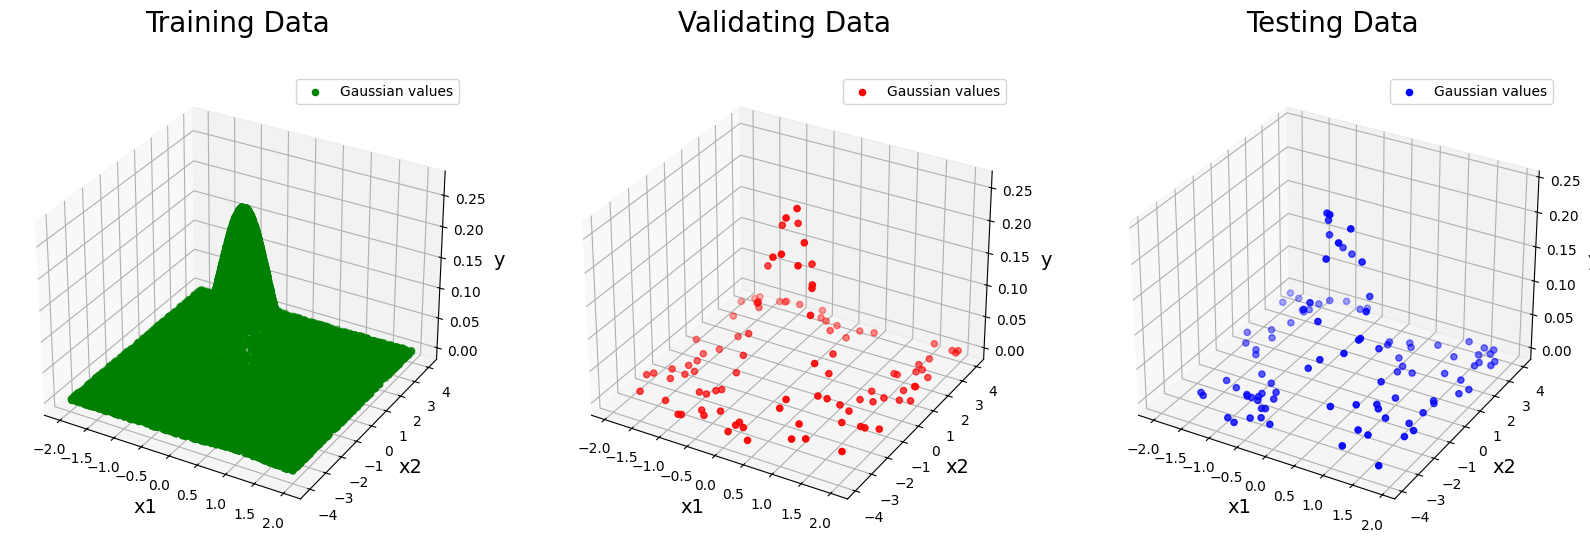

In [5]:
print("Training samples: ", len(x_train), " -- Shape: ", x_train.shape, y_train.shape)
print("Validating samples: ", len(x_valid), " -- Shape: ", x_valid.shape, y_valid.shape)
print("Testing samples: ", len(x_test), " -- Shape: ", x_test.shape, y_test.shape)

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1,3,1, projection='3d')
visualize_dataset(x_train, y_train, color = "green", title = "Training Data\n", ax = ax1)

ax2 = plt.subplot(1,3,2, projection='3d')
visualize_dataset(x_valid, y_valid, color = "red", title = "Validating Data\n", ax = ax2)

ax3 = plt.subplot(1,3,3, projection='3d')
visualize_dataset(x_test, y_test, color = "blue", title = "Testing Data\n", ax = ax3)